In [1]:
%pylab inline
from qdyn import propagator, animate_dynamics
from numpy.polynomial.hermite import hermval
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq
from numpy import trapz
plt.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


In [2]:
u=1.66053907e-27
me=9.1093837e-31

In [3]:
n_list=np.arange(0,50)

Ag=107*u/me
H=1*u/me
m_r=Ag*H/(Ag+H) # reduced mass

Dx=0.087709*(1) # set Eh to 1
rex=3.057*(1) #set a0 to 1
alpha=0.080*(1)#set a0 to 1
kx=2*Dx*((1/rex+2*alpha*rex))**2
omega_x=np.sqrt(kx/m_r)
del(Dx,rex,alpha)

Da=0.086184*(1) # set Eh to 1
rea=3.194*(1) #set a0 to 1
beta=0.76*(1)#set a0 to 1
ka=2*Da*beta**2-2*0.05*0.42**2
omega_a=np.sqrt(ka/m_r)

En_list= (n_list+0.5)*omega_x+0.10

In [4]:
3.194-3.057

0.137

In [5]:
kx,ka

(0.11687129856932414, 0.0819197568)

In [6]:
En_list

array([0.1040222 , 0.11206661, 0.12011101, 0.12815541, 0.13619982,
       0.14424422, 0.15228863, 0.16033303, 0.16837743, 0.17642184,
       0.18446624, 0.19251065, 0.20055505, 0.20859945, 0.21664386,
       0.22468826, 0.23273267, 0.24077707, 0.24882147, 0.25686588,
       0.26491028, 0.27295469, 0.28099909, 0.28904349, 0.2970879 ,
       0.3051323 , 0.31317671, 0.32122111, 0.32926551, 0.33730992,
       0.34535432, 0.35339873, 0.36144313, 0.36948753, 0.37753194,
       0.38557634, 0.39362075, 0.40166515, 0.40970955, 0.41775396,
       0.42579836, 0.43384277, 0.44188717, 0.44993157, 0.45797598,
       0.46602038, 0.47406479, 0.48210919, 0.49015359, 0.498198  ])

In [7]:
def Vx(x):
    return 0.087709*(1-3.057/x*e**(-0.08*(x**2-3.057**2)))**2+0.1

In [8]:
def Va(x):
    return 0.086184*(1-e**(-0.76*(x-3.194)))**2 - 0.05*e**(-(0.42*(x-6.9))**2)+0.237

In [9]:
def eigen_ho(x,v,m,k):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    x=x-3.057
    hermite_sum=np.zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-x**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * x,hermite_sum) 

In [10]:
def energy_ho_X(x):
    """Calculates the energy of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    return Vx(3.057)+0.5*kx*(x-3.057)**2

In [11]:
def energy_ho_A(x):
    """Calculates the energy of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    return Va(3.194)+0.5*ka*(x-3.194)**2

In [12]:
3.194-3.057

0.137

/var/folders/9c/48ctpqms7x15m8xsc5yq9tr40000gn/T/ipykernel_951/841517006.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return 0.087709*(1-3.057/x*e**(-0.08*(x**2-3.057**2)))**2+0.1


Text(0.5, 1.0, 'Energy of The Two States')

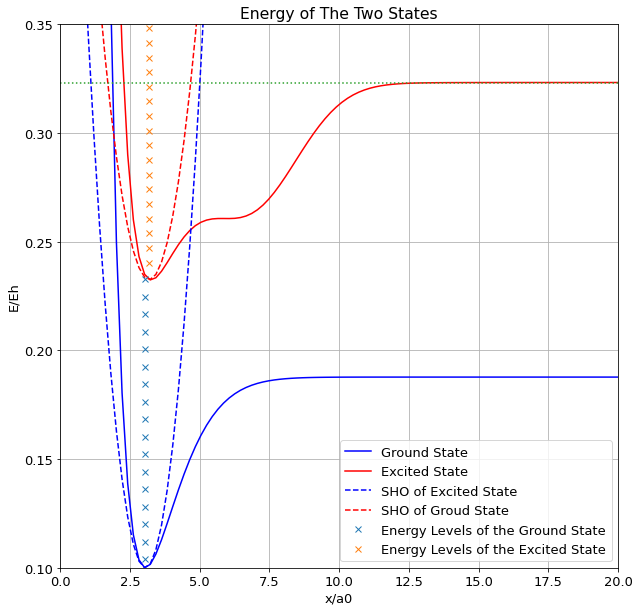

In [13]:
%matplotlib inline
plt.rcParams.update({'font.size':13 })
plt.figure(figsize=(10,10))
x_list=linspace(0,20,100)
plt.plot(x_list,Vx(x_list),label="Ground State",color="blue")
plt.plot(x_list,Va(x_list),label="Excited State",color="red")
plt.plot(x_list,energy_ho_X(x_list),label="SHO of Excited State",color="blue",linestyle="--")
plt.plot(x_list,energy_ho_A(x_list),label="SHO of Groud State",color="red",linestyle="--")
plt.plot([3.057]*17,[(n_list+0.5)*omega_x+0.10][0][0:17],linestyle="none",marker="x",label="Energy Levels of the Ground State")
plt.plot([3.194]*50,(n_list+0.5)*omega_a+0.237,linestyle="none",marker="x",label="Energy Levels of the Excited State")
plt.plot([0,20],[Va(20),Va(20)],linestyle="dotted")
plt.legend()
plt.grid()
plt.ylim(0.1,0.35)
plt.xlim(0,20)
plt.xlabel("x/a0")
plt.ylabel("E/Eh")
plt.title("Energy of The Two States")

(-2.0, 2.0)

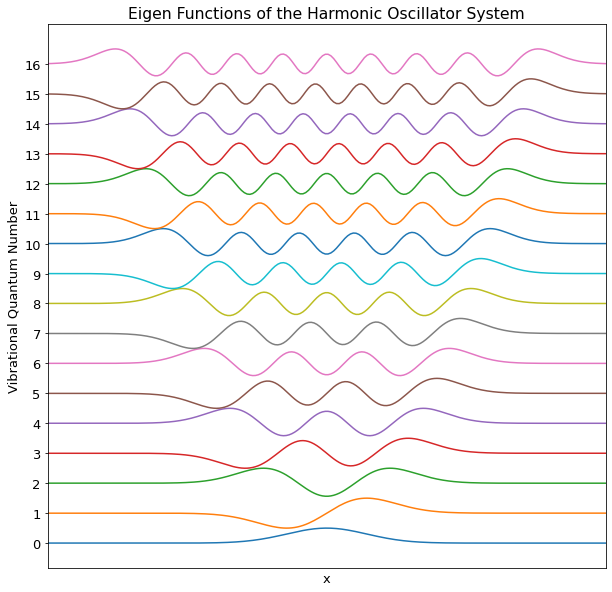

In [14]:
plt.figure(figsize=(10,10))
x_list=linspace(-10,10,1000)
for i in range(17):
    scale_factor=1/max(eigen_ho(x_list+3.057,i,m_r,ka))*0.5
    plt.plot(x_list,eigen_ho(x_list+3.057,i,m_r,ka)*scale_factor+1*i,linestyle="-")
plt.yticks(np.arange(0, 17, step=1))
plt.xticks([])
plt.xlabel("x")
plt.ylabel("Vibrational Quantum Number")
plt.title("Eigen Functions of the Harmonic Oscillator System")
plt.xlim(-2,2)

(0.0, 7.0)

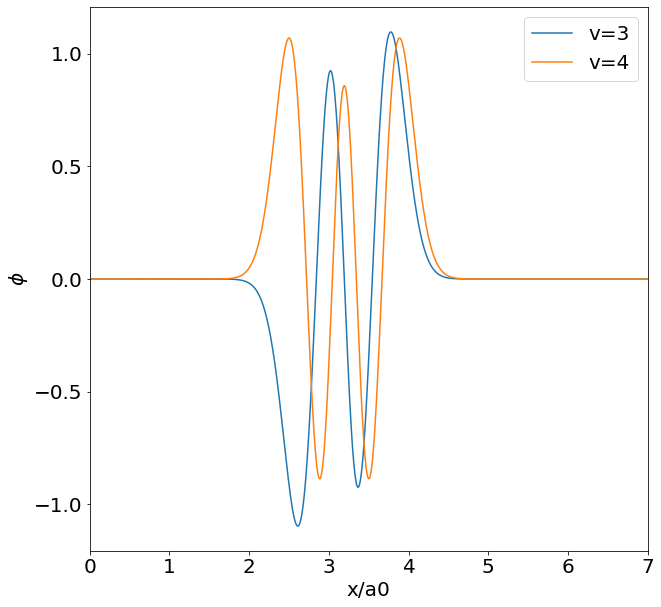

In [15]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
x_grid=np.linspace(-20 ,30 ,10000)
#plt.plot(x_grid,eigen_ho(x_grid-0.137,0,m_r,ka))
#plt.plot(x_grid,eigen_ho(x_grid-0.137,1,m_r,ka))
#plt.plot(x_grid,eigen_ho(x_grid-0.137,2,m_r,ka))
plt.plot(x_grid,eigen_ho(x_grid-0.137,3,m_r,ka),label="v=3")
plt.plot(x_grid,eigen_ho(x_grid-0.137,4,m_r,ka),label="v=4")
plt.ylabel("$\phi$")
plt.xlabel("x/a0")
plt.legend()

plt.xlim(-0,7)

In [16]:
def fk_factor(v):
    # v is the vibrational quantum number of the excited electronic state
    ground_eigen = eigen_ho(x_grid,0,m_r,kx)
    excited_eigen = eigen_ho(x_grid-0.137,v,m_r,ka)
    integrand=np.conj(ground_eigen) * excited_eigen
    fk = np.trapz(integrand,x_grid)
    return abs(fk)

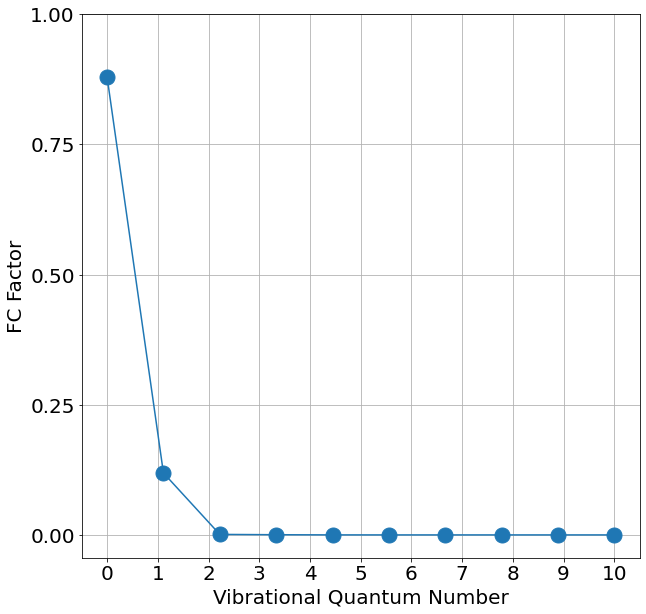

[0.8796763224212182, 0.11899408283453738, 0.0009580049068113313, 0.0003379089213152551, 3.31240328512419e-05, 2.6018918350982823e-07, 2.938573890259729e-07, 1.1232568358327425e-09, 1.6458395452184753e-09, 6.04234197777739e-11]


In [18]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
fk_list=[]
for i in range(10):
    fk_list.append(fk_factor(i)**2)
    
plt.plot(np.linspace(0,10,10),fk_list,marker="o",markersize=15)
plt.ylabel("FC Factor")
plt.xlabel("Vibrational Quantum Number")
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.arange(0,11))
plt.grid()
plt.show()
print(fk_list)

In [19]:
fk_list

[0.8796763224212182,
 0.11899408283453738,
 0.0009580049068113313,
 0.0003379089213152551,
 3.31240328512419e-05,
 2.6018918350982823e-07,
 2.938573890259729e-07,
 1.1232568358327425e-09,
 1.6458395452184753e-09,
 6.04234197777739e-11]

In [23]:
%matplotlib inline

In [22]:
%matplotlib qt
dt=10
nsteps=5000
x_grid=np.linspace(-20 ,30 ,10000)


#propagate the lowest eigen state of the ground eletronic state on the excited electronic state
data_harm=eigen_ho(x_grid,0,m_r,kx)
psi0=data_harm
wf_dynamics=np.zeros((nsteps+1,len(x_grid)),dtype=np.complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator(x_grid,wf_dynamics[step],m_r,dt,Va) # Apply the propagator to the wavefunction at current step in the array
    wf_dynamics[step+1]=psi # Add the new wavefunction to the array

#animate_dynamics(x_grid,wf_dynamics,dt,Va(x_grid),xlim=(0,20),frame_delay=0.1)

In [24]:
import pickle

with open('dt10_5000.dat','wb') as data_f:
    pickle.dump(wf_dynamics,data_f)

In [25]:
with open('dt10_5000.dat','rb') as data_f:
    dt10_5000 = pickle.load(data_f)
with open('dt5_5000.dat','rb') as data_f:
    dt5_5000 = pickle.load(data_f)  
with open('dt30_5000.dat','rb') as data_f:
    dt30_5000 = pickle.load(data_f)

FileNotFoundError: [Errno 2] No such file or directory: 'dt5_5000.dat'

In [26]:
#plot the autocorrelation function
A_auto = trapz((conj(wf_dynamics[0])*wf_dynamics),x_grid)

In [27]:
%matplotlib qt
animate_dynamics(x_grid,wf_dynamics,dt,Va(x_grid),xlim=(0,20),frame_delay=0.00000001)

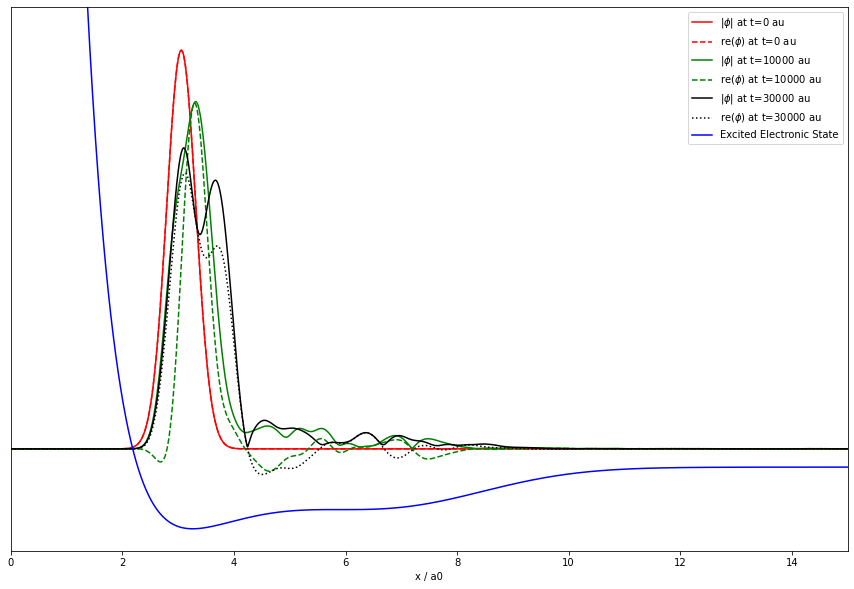

In [84]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(x_grid,0.4*abs(wf_dynamics[0])+0.35,color="red",label="$|\phi|$ at t=0 au")
plt.plot(x_grid,0.4*real(wf_dynamics[0])+0.35,color="red",linestyle="--",label="re($\phi$) at t=0 au")

plt.plot(x_grid,0.4*abs(wf_dynamics[2000])+0.35,color="green",label="$|\phi|$ at t=10000 au")
plt.plot(x_grid,0.4*real(wf_dynamics[2000])+0.35,color="green",linestyle="--",label="re($\phi$) at t=10000 au")

plt.plot(x_grid,0.4*abs(wf_dynamics[6000])+0.35,color="black",label="$|\phi|$ at t=30000 au")
plt.plot(x_grid,0.4*real(wf_dynamics[6000])+0.35,color="black",linestyle="dotted",label="re($\phi$) at t=30000 au")

plt.plot(x_grid,Va(x_grid),color="blue",label="Excited Electronic State")
plt.xlabel("x / a0")
plt.ylim(0.2,1)
plt.xlim(0,15)
plt.yticks([])
plt.legend()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

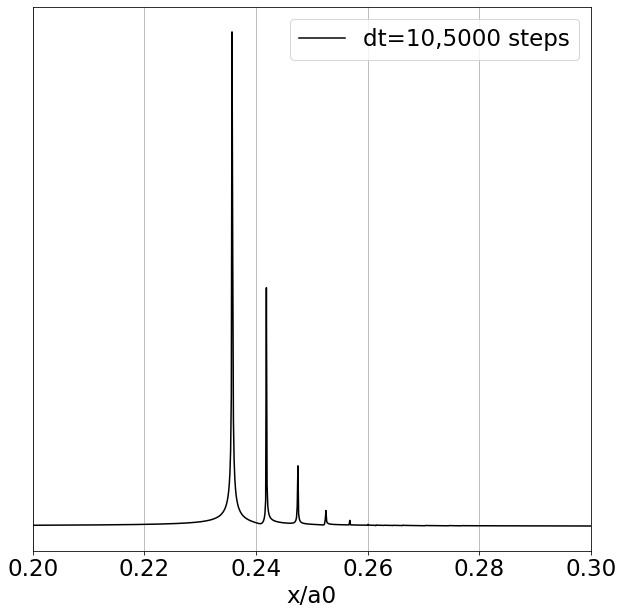

In [126]:
#plot the autocorrelation function
plt.rcParams.update({'font.size':23 })
plt.figure(figsize=(10,10))
def process(data,dt,n_steps):
    A_auto = trapz((conj(data[0])*data),x_grid)
    plt.figure(figsize=(10,10))
    time=linspace(0,dt*n_steps,n_steps+1) # Define a grid in time

    gauss_t=np.real(A_auto) # Define a gaussian function of time

    # Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
    gauss_w=ifftshift(ifft(gauss_t,norm="ortho")) 

    # Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
    frequency=2*pi*fftshift(fftfreq(len(time),d=dt))

    return [frequency,abs(gauss_w)]
%matplotlib inline
plt.rcParams.update({'font.size':23 })
plt.figure(figsize=(10,10))
plt.plot(process(dt10_5000,10,5000)[0],process(dt10_5000,10,5000)[1],label="dt=10,5000 steps",color="black") # Plot the transformed function
#plt.plot(process(dt5_5000,5,5000)[0],process(dt5_5000,5,5000)[1],label="dt=5,5000 steps",color="red") # Plot the transformed function
#plt.plot(process(dt5_1000,5,1000)[0],process(dt5_1000,5,1000)[1],label="dt=5,1000 steps",color="blue") # Plot the transformed function
plt.xlim(0.2,0.3)
plt.xlabel("x/a0")
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

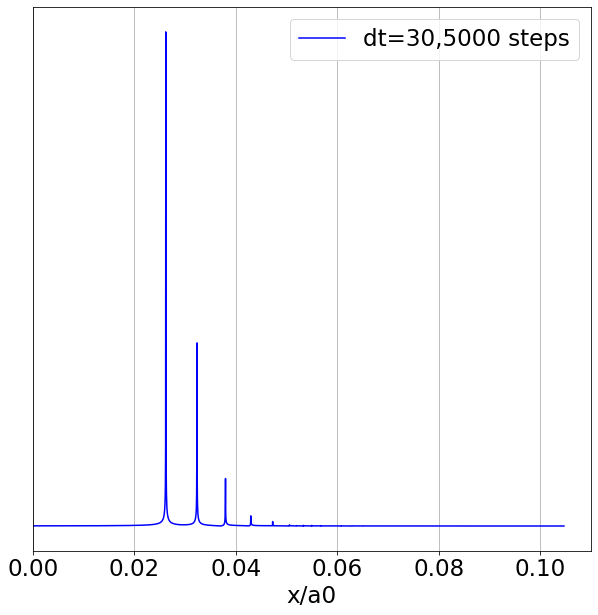

In [129]:
plt.rcParams.update({'font.size':23 })
plt.figure(figsize=(10,10))
#plt.plot(process(dt5_5000,5,5000)[0],process(dt5_5000,5,5000)[1],label="dt=5,5000 steps",color="red") # Plot the transformed function
plt.plot(process(dt30_5000,30,5000)[0],process(dt30_5000,30,5000)[1],label="dt=30,5000 steps",color="blue") # Plot the transformed function

plt.xlim(0,0.11)
plt.xlabel("x/a0")
plt.yticks([])
plt.legend()
plt.grid()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

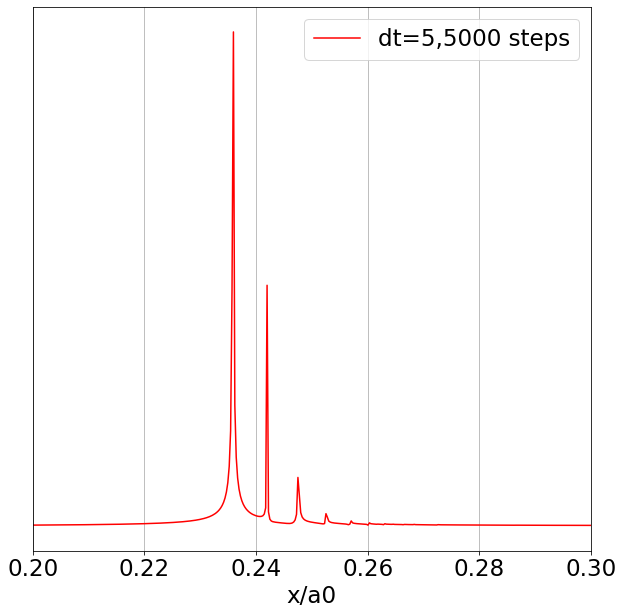

In [124]:
plt.rcParams.update({'font.size':23 })
plt.figure(figsize=(10,10))
plt.plot(process(dt5_5000,5,5000)[0],process(dt5_5000,5,5000)[1],label="dt=5,5000 steps",color="red") # Plot the transformed function
plt.xlim(0.2,0.3)
plt.xlabel("x/a0")
plt.yticks([])
plt.legend()
plt.grid()

Text(0, 0.5, 'Autocorrelated Function')

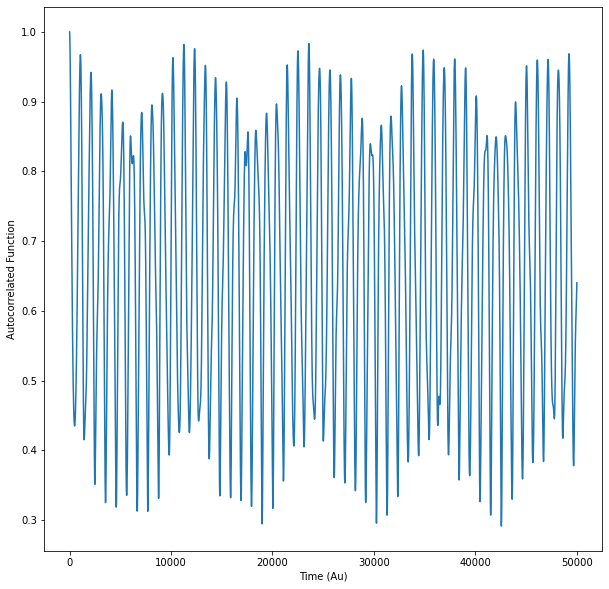

In [24]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(linspace(0,(nsteps+1)*dt,nsteps+1),np.abs(A_auto))
plt.xlabel("Time (Au)")
plt.ylabel("Autocorrelated Function")

Text(0.5, 0, 'Time(Au)')

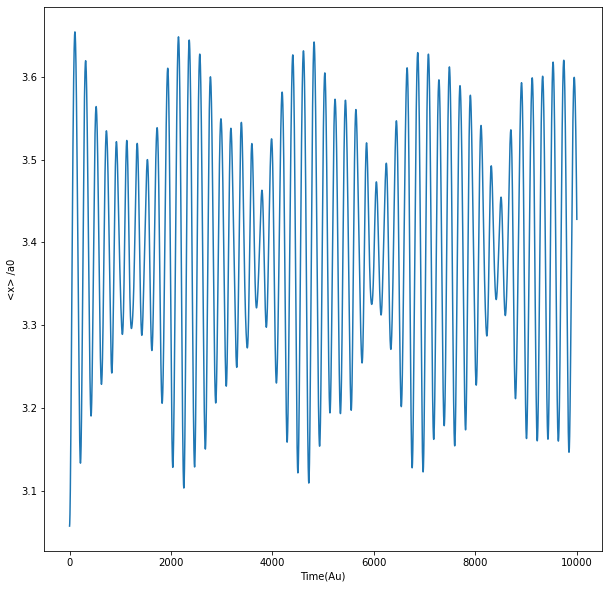

In [25]:
def exp_pos(dynamics,x_grid):
    mean_pos_list=[]
    for i in range(len(dynamics)):
        integrand=np.conj(dynamics[i]) * dynamics[i] * x_grid
        mean_pos = np.trapz(integrand,x_grid) 
        mean_pos_list.append(np.real(mean_pos))
    return mean_pos_list
exp_pos_list=exp_pos(wf_dynamics,x_grid) 
plt.figure(figsize=(10,10))
plt.plot(np.abs(exp_pos_list))
plt.ylabel("<x> /a0")
plt.xlabel("Time(Au)")

(0.2, 0.3)

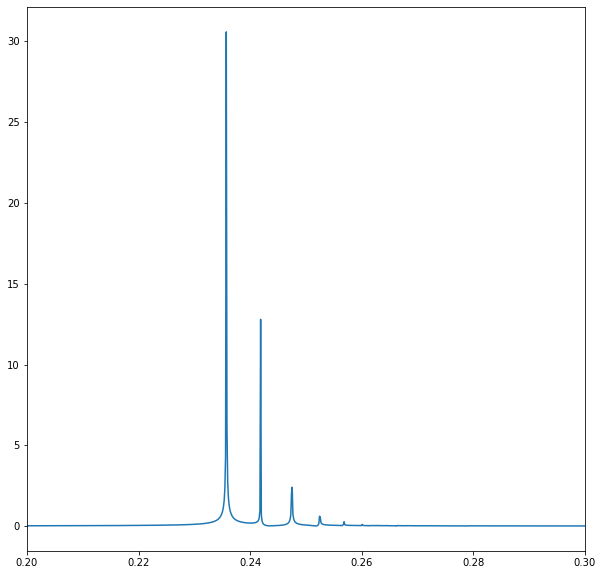

In [26]:
%matplotlib inline
plt.figure(figsize=(10,10))
time=linspace(0,dt*nsteps,nsteps+1) # Define a grid in time

gauss_t=np.real(A_auto) # Define a gaussian function of time

# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(gauss_t,norm="ortho")) 

# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2*pi*fftshift(fftfreq(len(time),d=dt))

plt.plot(frequency,abs(gauss_w)) # Plot the transformed function
plt.xlim(0.2,0.3)

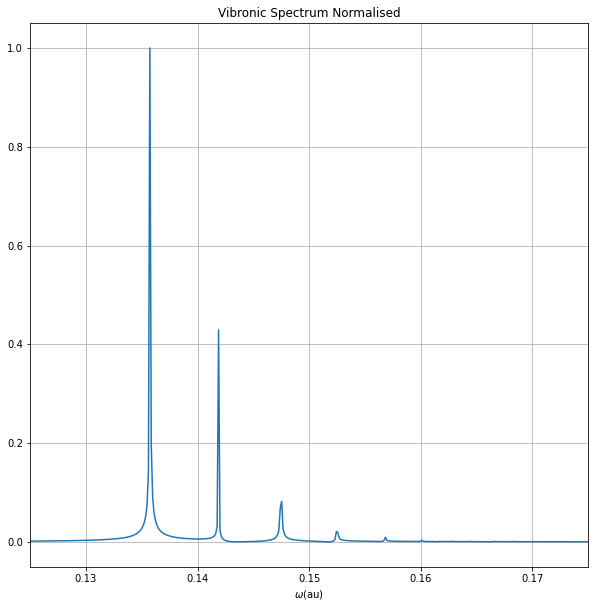

In [27]:
plt.figure(figsize=(10,10))

hbar=1
c = 137

Spectrum = 2*pi*(frequency)/(3*hbar*c) *sqrt(2*pi) * gauss_w
Spectrum = Spectrum / np.max(Spectrum)
plot(frequency -0.1, abs(Spectrum))
title('Vibronic Spectrum Normalised')
plt.xlabel("$\omega$(au)")
plt.xlim(0.125,0.175)
plt.grid()

In [28]:
Excited_energy_list = (n_list+0.5)*omega_a+0.237
Excited_energy_list

array([0.24036747, 0.24710242, 0.25383737, 0.26057232, 0.26730727,
       0.27404222, 0.28077716, 0.28751211, 0.29424706, 0.30098201,
       0.30771696, 0.31445191, 0.32118685, 0.3279218 , 0.33465675,
       0.3413917 , 0.34812665, 0.35486159, 0.36159654, 0.36833149,
       0.37506644, 0.38180139, 0.38853634, 0.39527128, 0.40200623,
       0.40874118, 0.41547613, 0.42221108, 0.42894603, 0.43568097,
       0.44241592, 0.44915087, 0.45588582, 0.46262077, 0.46935572,
       0.47609066, 0.48282561, 0.48956056, 0.49629551, 0.50303046,
       0.50976541, 0.51650035, 0.5232353 , 0.52997025, 0.5367052 ,
       0.54344015, 0.55017509, 0.55691004, 0.56364499, 0.57037994])

In [29]:
from scipy.signal import find_peaks
peak_pos_list=[]
peak_height_list=[]

for i in range(len(find_peaks(abs(gauss_w))[0])):
    peak_pos_list.append(frequency[find_peaks(abs(gauss_w))[0][i]])
    peak_height_list.append(Spectrum[find_peaks(abs(gauss_w))[0][i]])
peak_pos_list = np.array(peak_pos_list)-0.1
peak_height_list = np.array(peak_height_list)

In [30]:
peak_pos_list

array([-0.42116432, -0.4196565 , -0.41789739, -0.41601262, -0.4140022 ,
       -0.41199178, -0.40973006, -0.40746834, -0.40520662, -0.4029449 ,
       -0.40055753, -0.39817016, -0.39565713, -0.39326976, -0.39088239,
       -0.38849502, -0.385982  , -0.38359463, -0.37894553, -0.37668381,
       -0.37442209, -0.37216037, -0.3700243 , -0.36801388, -0.36612912,
       -0.36424435, -0.36261088, -0.36135437, -0.35984656, -0.35657963,
       -0.35218184, -0.34728145, -0.34162714, -0.33547024,  0.13572154,
        0.14187845,  0.14753275,  0.15243314,  0.15683093,  0.16009786,
        0.16160568,  0.16286219,  0.16449565,  0.16638042,  0.16826519,
        0.1702756 ,  0.17241167,  0.17467339,  0.17693511,  0.17919684,
        0.18384593,  0.1862333 ,  0.18874632,  0.19113369,  0.19352107,
        0.19590844,  0.19842146,  0.20080883,  0.2031962 ,  0.20545792,
        0.20771964,  0.20998136,  0.21224309,  0.2142535 ,  0.21626392,
        0.21814869,  0.21990781,  0.22141562])

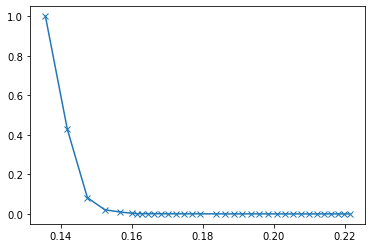

In [31]:
a = int(len(peak_pos_list)/2)
plt.plot(peak_pos_list[a:],abs(peak_height_list)[a:],marker="x")

In [32]:
condition = (peak_pos_list > 0)
extracted = np.extract(condition, peak_pos_list)
extracted

array([0.13572154, 0.14187845, 0.14753275, 0.15243314, 0.15683093,
       0.16009786, 0.16160568, 0.16286219, 0.16449565, 0.16638042,
       0.16826519, 0.1702756 , 0.17241167, 0.17467339, 0.17693511,
       0.17919684, 0.18384593, 0.1862333 , 0.18874632, 0.19113369,
       0.19352107, 0.19590844, 0.19842146, 0.20080883, 0.2031962 ,
       0.20545792, 0.20771964, 0.20998136, 0.21224309, 0.2142535 ,
       0.21626392, 0.21814869, 0.21990781, 0.22141562])

In [33]:
x = np.linspace(0,len(extracted),len(extracted))

(0.2, 0.5)

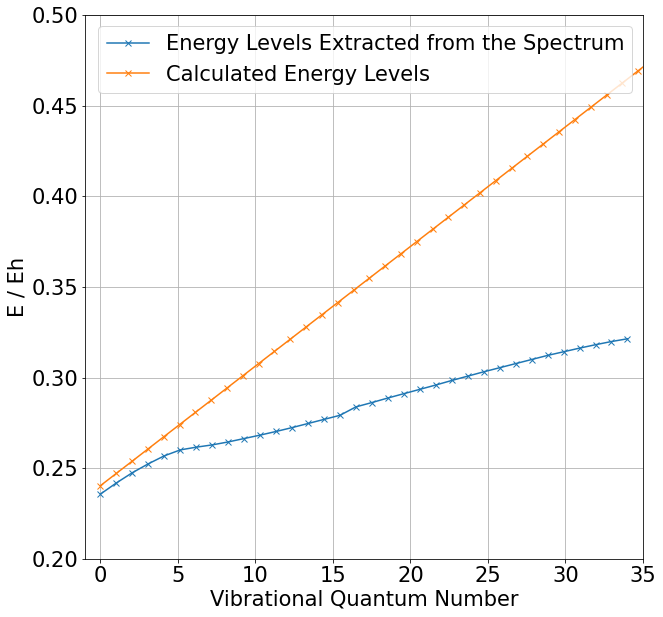

In [34]:
plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(10,10))
plt.plot(x,extracted+0.1,marker="x",label="Energy Levels Extracted from the Spectrum")
plt.plot(np.linspace(0,len(Excited_energy_list),len(Excited_energy_list)),Excited_energy_list,marker="x",label="Calculated Energy Levels")
plt.legend()
plt.xlabel("Vibrational Quantum Number")
plt.ylabel("E / Eh")
plt.grid()
plt.xlim(-1,35)
plt.ylim(0.2,0.5)

In [44]:
%matplotlib qt
dt=5
nsteps=5000
x_grid=np.linspace(-20 ,30 ,10000)


#propagate the lowest eigen state of the ground eletronic state on the excited electronic state
data_harm=eigen_ho(x_grid-0.137,3,m_r,ka)
psi0=data_harm
wf_dynamics=np.zeros((nsteps+1,len(x_grid)),dtype=np.complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator(x_grid,wf_dynamics[step],m_r,dt,Va) # Apply the propagator to the wavefunction at current step in the array
    wf_dynamics[step+1]=psi # Add the new wavefunction to the array

#animate_dynamics(x_grid,wf_dynamics,dt,Va(x_grid),xlim=(0,20),frame_delay=0.1)

Traceback (most recent call last):
  File "/Users/wang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 270, in process
    func(*args, **kwargs)
  File "/Users/wang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 995, in _start
    self.event_source.add_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'add_callback'
Traceback (most recent call last):
  File "/Users/wang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 270, in process
    func(*args, **kwargs)
  File "/Users/wang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 995, in _start
    self.event_source.add_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'add_callback'
Traceback (most recent call last):
  File "/Users/wang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 270, in process
    func(*args, **kwargs)
  File "/Users/wang/opt/anaconda3

In [59]:
t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif3=np.e**(1j*(peak_pos_list[3]+0.5*omega_x+0.1)*t_grid)
integrand3=[]
newwf3=[]
for i in range(len(wf_dynamics[0])):
    integrandd3=shif3*wf_dynamics[:,i]
    integrand3.append(integrandd3)
for i in integrand3:
    newwf3.append(np.trapz(i,t_grid))

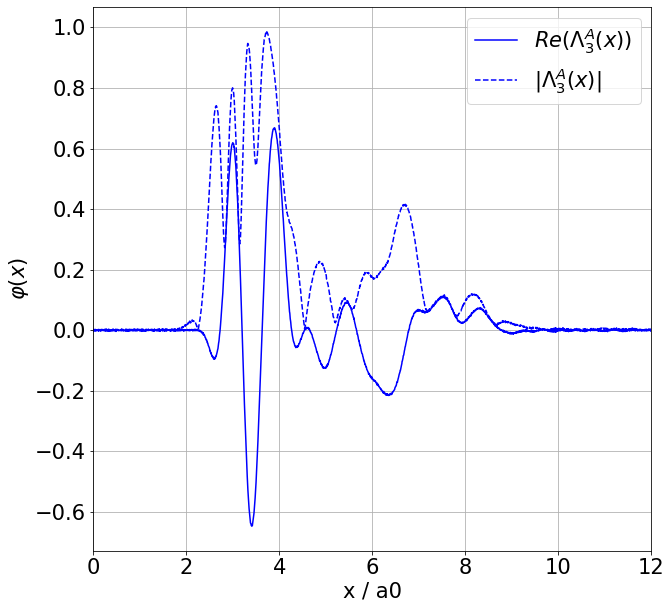

In [60]:
%matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(10,10))
plt.plot(x_grid,-np.real(newwf3/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid))),label='$Re(\Lambda_3^A(x))$',color="blue")
plt.plot(x_grid,np.abs(newwf3)/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid)),label='$|\Lambda_3^A(x)|$',color="blue",linestyle="--")
plt.ylabel(r'$\varphi(x)$')
plt.xlabel('x / a0')
plt.legend()
plt.grid()
plt.xlim(0,12)
plt.savefig('excitedv9')

In [62]:
%matplotlib qt
dt=5
nsteps=5000
x_grid=np.linspace(-20 ,30 ,10000)


#propagate the lowest eigen state of the ground eletronic state on the excited electronic state
data_harm=eigen_ho(x_grid-0.137,4,m_r,ka)
psi0=data_harm
wf_dynamics=np.zeros((nsteps+1,len(x_grid)),dtype=np.complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator(x_grid,wf_dynamics[step],m_r,dt,Va) # Apply the propagator to the wavefunction at current step in the array
    wf_dynamics[step+1]=psi # Add the new wavefunction to the array

#animate_dynamics(x_grid,wf_dynamics,dt,Va(x_grid),xlim=(0,20),frame_delay=0.1)

In [63]:
t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_pos_list[4]+0.5*omega_x+0.1)*t_grid)
integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics[0])):
    integrandd4=shif4*wf_dynamics[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))

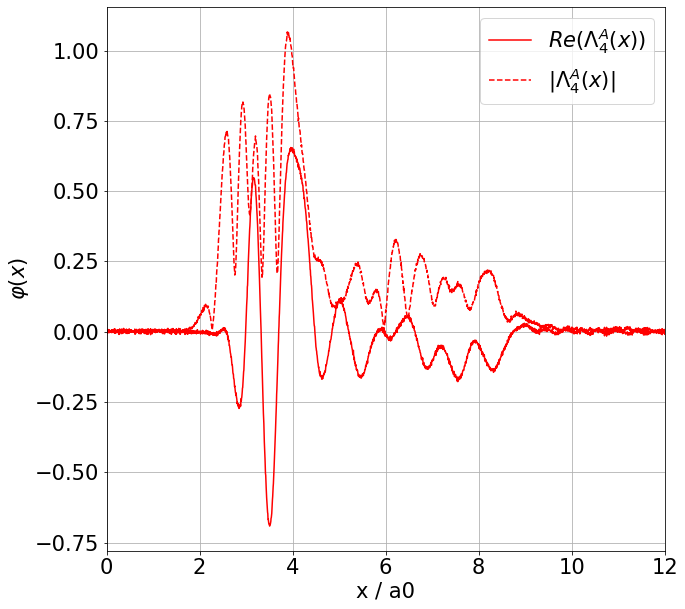

In [69]:
%matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(10,10))
#plt.plot(x_grid,-np.real(newwf3/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid))),label='$Re(\Lambda_3^A(x))$',color="blue")
#plt.plot(x_grid,np.abs(newwf3)/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid)),label='$|\Lambda_3^A(x)|$',color="blue",linestyle="--")

plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_4^A(x))$',color="red")
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_4^A(x)|$',color="red",linestyle="--")

plt.ylabel(r'$\varphi(x)$')
plt.xlabel('x / a0')
plt.legend()
plt.grid()
plt.xlim(0,12)
plt.savefig('excitedv9')